# Final Project

### Part 0: Preparing the Data

In [2]:
#having issues with numpy (and jupyter notebook) so have to use the following 3 lines for now...
import sys
sys.path.insert(0,'/opt/anaconda3/lib/python3.9/site-packages')
print(sys.path)

# edit
#import statements
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

['/opt/anaconda3/lib/python3.9/site-packages', '/Users/andresuzanne/Documents/GaTech/PHYS 6260/Project/ML-Stellar_Classification', '/Users/andresuzanne/.vscode/extensions/ms-toolsai.jupyter-2022.1.1301854968/pythonFiles', '/Users/andresuzanne/.vscode/extensions/ms-toolsai.jupyter-2022.1.1301854968/pythonFiles/lib/python', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/andresuzanne/Library/Python/3.9/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages']


In [3]:
#read in the dataset
path = "star_classification.csv"
raw_data = pd.read_csv(path)

#raw_data

raw_data[:12]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
# convert string labels into numbers: galaxy=0, qso=1, star=2
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

num_df = Encoder(raw_data)
num_df[:12]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,1,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,2,-0.000008,2444,54082,232


In [5]:
# convert into two datasets: features, X (everything excluding "class" column), and labels, y (just the "class" column)
#first convert pd dataframe to np array bc I know how to work with that better
arr = num_df.to_numpy()
type(arr)

#arr[0:3]
labels = arr[:,13]

features = np.delete(arr, 13, axis=1)
features = np.delete(arr, [0,1,2,8,9,10,11,12,13,15,16,17], axis=1)
print(features)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=40)


[[23.87882   22.2753    20.39501   19.16573   18.79371    0.6347936]
 [24.77759   22.83188   22.58444   21.16812   21.61427    0.779136 ]
 [25.26307   22.66389   20.60976   19.34857   18.94827    0.6441945]
 ...
 [21.16916   19.26997   18.20428   17.69034   17.35221    0.1433656]
 [25.35039   21.63757   19.91386   19.07254   18.62482    0.4550396]
 [22.62171   21.79745   20.60115   20.00959   19.28075    0.5429442]]


### Part 1: Logistic Regression

In [5]:
#in this cell are my attempts to build it from scratch; I then realized there are pre-made programs for things 
#like this in libraries such as sklearn

###define the sigmoid function:
#def sigmoid(z):
#    return 1 / (1 + np.exp(-z))

###define the cost function:
#def J(theta, X, y, lamb):
#    summation = sum(((-yp*log(sigmoid(X*theta))) - ((1 .- yp)*log(1 .- sigmoid(X*theta)))))
#    J1 = (1/m) * summation
#    return J1 + (lamb/(2*m)) * (sum(theta(2:rows(theta)).^2))

###define derivative of cost function:
#def grad(theta,X,y,lamb):
#    x = [0]
#    return ((1/m) * Xp*(sigmoid(X*theta) - y)) + [x; (lamb/m)*theta(2:rows(theta))]

In [ ]:
#fit the model according to the given training data.
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X, y)

#Predict class labels for samples in X
testdata_features = features[70000:, :]
#I think the below definition is incorrect (trying to get rows 70,000 to 100,000 of the labels column)
testdata_labels = features[:, 70000:]
clf.predict(testdata_features)

#Return the mean accuracy on the given test data and labels.
clf.score(X,y)

### Part 2: Random Forest

In [22]:
#fit the model according to the given training data.
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

#Predict class labels for samples in X
print(clf.predict(testdata_features))

#Return the mean accuracy on the given test data and labels
score(testdata_features, testdata_labels, sample_weight=None)


/var/folders/hc/_g40sknj4mxbq0bmp0c446n00000gq/T/ipykernel_2651/2594846787.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


NameError: name 'testdata_features' is not defined

### Part 3: Neural Net

/Users/andresuzanne/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


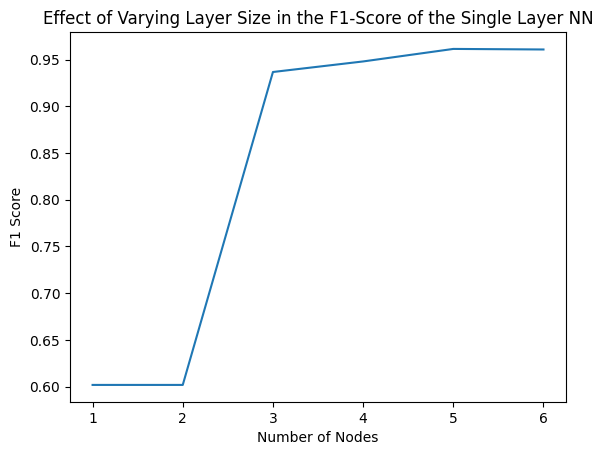

In [11]:
# Arrays for F1 Scores, Accuracies and Node Count
f1scores = []
accuracies = []
layer_size = np.arange(1,7,1)

# Looping through node count, training model each iteration and computing statistics
for i in range(1,7):
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation='relu', solver='adam', max_iter=500)
    mlp.fit(X_train,y_train)
    predict_test = mlp.predict(X_test)
    accuracies.append(accuracy_score(y_test,predict_test))
    f1scores.append(f1_score(y_test,predict_test, average='micro'))

# Plot F1 Score vs Node Count
plt.plot(layer_size, f1scores)
plt.xlabel('Number of Nodes')
plt.ylabel('F1 Score')
plt.title('Effect of Varying Layer Size in the F1-Score of the Single Layer NN')
plt.show()


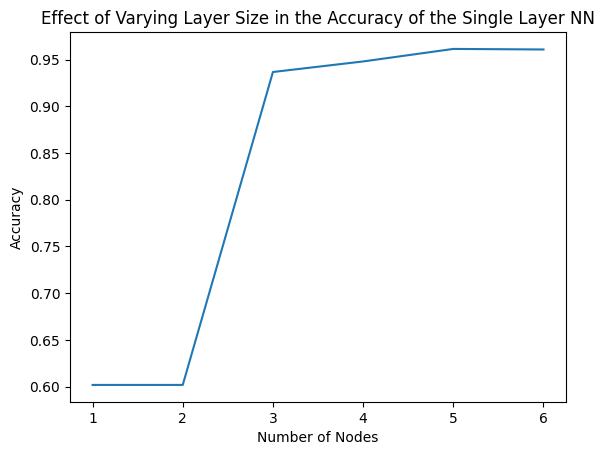

In [12]:
# Plot Accuracy vs Node Count
plt.plot(layer_size, accuracies)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Effect of Varying Layer Size in the Accuracy of the Single Layer NN')
plt.show()

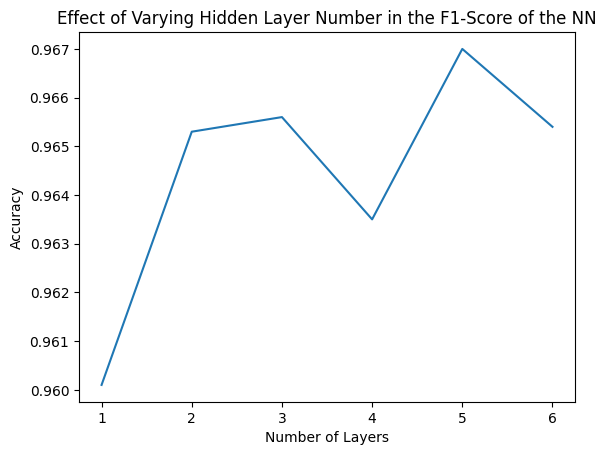

In [7]:
# Arrays for F1 Scores, Accuracies and Layer Count
f1scores = []
accuracies = []
layer_number = np.arange(1,7,1)
layer_size = [6]

# Looping through layer size, training model each iteration and computing statistics
for i in range(1,7):
    mlp = MLPClassifier(hidden_layer_sizes=layer_size, activation='relu', solver='adam', max_iter=500)
    mlp.fit(X_train,y_train)
    predict_test = mlp.predict(X_test)
    f1scores.append(f1_score(y_test,predict_test, average='micro'))
    accuracies.append(accuracy_score(y_test,predict_test))
    layer_size.append(6)


plt.plot(layer_number, f1scores)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Effect of Varying Hidden Layer Number in the F1-Score of the NN')
plt.show()

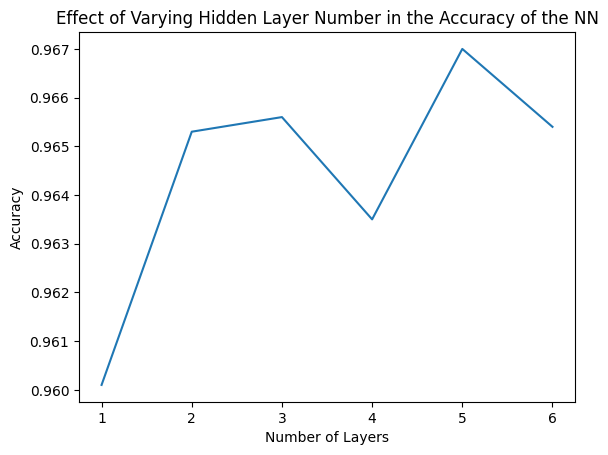

In [8]:
# Plot Accuracy vs Layer Count
plt.plot(layer_number, accuracies)
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Effect of Varying Hidden Layer Number in the Accuracy of the NN')
plt.show()

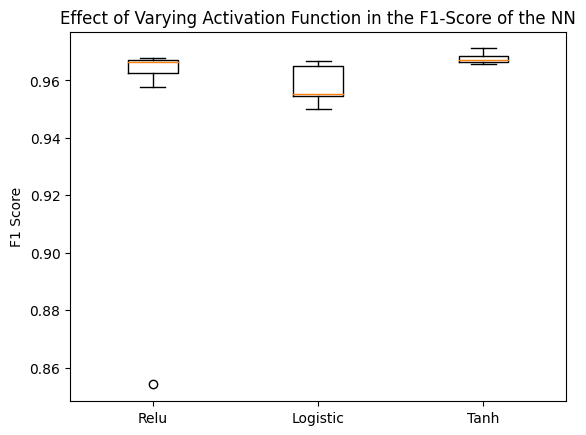

In [9]:
# Arrays for F1 Scores
f1scores_l = []
f1scores_r = []
f1scores_t = []

# Arrays for Accuracies
acc_l = []
acc_r = []
acc_t = []

# 10 Loops, training three models each time with 3 different activation functions
# Compute Statistics
for i in range(10):
    mlp_l = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6), activation='logistic', solver='adam', max_iter=500)
    mlp_r = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6), activation='relu', solver='adam', max_iter=500)
    mlp_t = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6), activation='tanh', solver='adam', max_iter=500)
    
    mlp_l.fit(X_train,y_train)
    mlp_r.fit(X_train,y_train)
    mlp_t.fit(X_train,y_train)

    predict_test_l = mlp_l.predict(X_test)
    predict_test_r = mlp_r.predict(X_test)
    predict_test_t = mlp_t.predict(X_test)

    f1scores_l.append(f1_score(y_test,predict_test_l, average='micro'))
    f1scores_r.append(f1_score(y_test,predict_test_r, average='micro'))
    f1scores_t.append(f1_score(y_test,predict_test_t, average='micro'))

    acc_l.append(accuracy_score(y_test,predict_test_l))
    acc_r.append(accuracy_score(y_test,predict_test_r))
    acc_t.append(accuracy_score(y_test,predict_test_t))


data = [f1scores_r, f1scores_l, f1scores_t]
data_a = [acc_r, acc_l, acc_t]    
labels = ('Relu', 'Logistic', 'Tanh')

# Boxplot of F1 Score
plt.boxplot(data)
plt.title('Effect of Varying Activation Function in the F1-Score of the NN')
plt.xticks(np.arange(len(labels))+1,labels)
plt.ylabel('F1 Score')
plt.show()

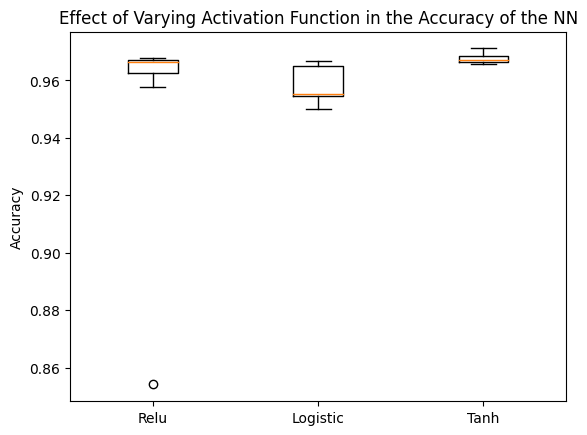

In [10]:
# Boxplot of Accuracy
plt.boxplot(data_a)
plt.title('Effect of Varying Activation Function in the Accuracy of the NN')
plt.xticks(np.arange(len(labels))+1,labels)
plt.ylabel('Accuracy')
plt.show()